# K-Nearest Neighbors

Utilizar o modelo KNN para classificar frutas

Dataset público do Kaggle disponível em https://www.kaggle.com/mjamilmoughal/fruits-with-colors-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('fruit_data_with_colors.txt')

In [3]:
dados.head()

,fruit_label\tfruit_name\tfruit_subtype\tmass\twidth\theight\tcolor_score
0,1\tapple\tgranny_smith\t192\t8.4\t7.3\t0.55
1,1\tapple\tgranny_smith\t180\t8.0\t6.8\t0.59
2,1\tapple\tgranny_smith\t176\t7.4\t7.2\t0.60
3,2\tmandarin\tmandarin\t86 \t6.2\t4.7\t0.80
4,2\tmandarin\tmandarin\t84 \t6.0\t4.6\t0.79


Pandas tem dificuldade em localizar o separador em arquivos TXT e portanto devemos fazer isso manualmente

In [4]:
dados = pd.read_csv('fruit_data_with_colors.txt',sep='\t')

In [5]:
dados.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


Vamos determinar o número de classes (tipos de frutas) e as respectivas quantidades

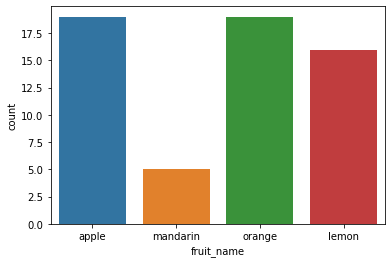

In [7]:
sns.countplot(x='fruit_name',data=dados)

In [8]:
dados['fruit_name'].value_counts()

orange      19
apple       19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

Observamos que temos um dataset não balanceado devido a quantidade da fruta mandarim. Iremos descobrir se isto irá ou não afetar o nosso modelo

Verificando se existem NaNs ou elementos nulos na amostra

In [9]:
dados.isna().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [10]:
dados.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

Da análise observamos que tais elementos não existem

Obtendo os nomes das colunas

In [11]:
colunas = dados.columns

In [12]:
colunas

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

Removendo as colunas fruit_label e fruit_name

In [13]:
colunas = colunas.drop(['fruit_label', 'fruit_name'])

In [14]:
colunas

Index(['fruit_subtype', 'mass', 'width', 'height', 'color_score'], dtype='object')

Normalizando os dados

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc=StandardScaler()

In [17]:
dados[colunas.drop('fruit_subtype')] = sc.fit_transform(dados[colunas.drop('fruit_subtype')])

In [18]:
dados.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,0.529442,1.598690,-0.291397,-2.793595
1,1,apple,granny_smith,0.309462,1.104854,-0.661922,-2.268684
2,1,apple,granny_smith,0.236136,0.364100,-0.365502,-2.137456
3,2,mandarin,mandarin,-1.413709,-1.117409,-2.218131,0.487100
4,2,mandarin,mandarin,-1.450372,-1.364327,-2.292236,0.355872


A coluna fruit_subtype é uma variável categórica e precisa ser convertida para numérica

In [19]:
from sklearn.preprocessing import LabelEncoder, label_binarize

In [20]:
enconder = LabelEncoder()

In [21]:
dados['fruit_subtype'] = enconder.fit_transform(dados['fruit_subtype'])

In [22]:
classes = dados['fruit_label'].unique()
n_classes = len(classes)

In [23]:
classes

array([1, 2, 3, 4])

In [24]:
n_classes

4

In [25]:
dados.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,3,0.529442,1.598690,-0.291397,-2.793595
1,1,apple,3,0.309462,1.104854,-0.661922,-2.268684
2,1,apple,3,0.236136,0.364100,-0.365502,-2.137456
3,2,mandarin,4,-1.413709,-1.117409,-2.218131,0.487100
4,2,mandarin,4,-1.450372,-1.364327,-2.292236,0.355872


Separando nas variáveis X e Y

In [26]:
X = dados.drop(['fruit_label','fruit_name'],axis=1).values
Y = dados['fruit_label'].values

In [27]:
Y = label_binarize(Y, classes=classes)

Separando em amostras de treino e teste

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.25,random_state=0)

Aplicando modelo KNN

No modelo KNN o número de vizinhos é uma variável de entrada. Para melhor determinar este número, iremos cacular a acurácia no intervalo entre 1 e 10.

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
vizinhos = []
acc_treino = []
acc_teste = []
std = []

In [32]:
for i in range(2,11):
    vizinhos.append(i)
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_treino,Y_treino)
    acc_treino.append(knn.score(X_treino,Y_treino))
    acc_teste.append(knn.score(X_teste,Y_teste))
    Y_previsto = knn.predict(X_teste)
    std.append(np.std(Y_previsto==Y_teste)/np.sqrt(Y_previsto.shape[0]))

Graficando acurácias em função do número de vizinhos

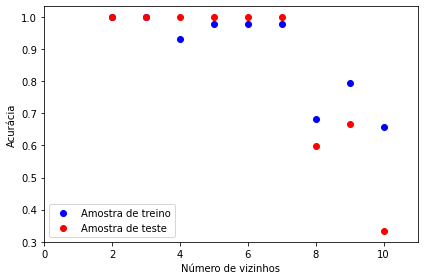

In [33]:
plt.scatter(vizinhos,acc_treino,label='Amostra de treino',color='blue')
plt.scatter(vizinhos,acc_teste,label='Amostra de teste',color='red')
plt.xlabel('Número de vizinhos')
plt.ylabel('Acurácia')
plt.xlim([0,11])
plt.legend(loc='lower left')
plt.tight_layout()

Observamos que no intervalo 0<n_vizinhos<5 a acurácia de treino e teste é praticamente máxima. Por este motivo adotaremos n=4

In [34]:
knn=KNeighborsClassifier(n_neighbors=4)

In [35]:
knn.fit(X_treino,Y_treino)

KNeighborsClassifier(n_neighbors=4)

In [36]:
Y_previsto = knn.predict(X_teste)
y_prob = knn.predict_proba(X_teste)

Gerando matriz de confusão

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
cm=confusion_matrix(Y_teste.argmax(axis=1),Y_previsto.argmax(axis=1))

In [39]:
cm

array([[4, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 8, 0],
       [0, 0, 0, 2]])

Calculando métricas

In [40]:
from sklearn.metrics import classification_report,f1_score,precision_score,average_precision_score,recall_score,accuracy_score

Relatório de classificação

In [41]:
cr = classification_report(Y_teste,Y_previsto,labels=[0,1])
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5
 samples avg       0.33      0.33      0.33         5



/home/usuario/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/usuario/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1-score

In [42]:
f1_macro = f1_score(Y_teste,Y_previsto,average='macro')
print("F1 Macro score = {:0.2f}%".format(f1_macro*100))

f1_wei = f1_score(Y_teste,Y_previsto,average='weighted')
print("F1 Weighted score = {:0.2f}%".format(f1_wei*100))

F1 Macro score = 100.00%
F1 Weighted score = 100.00%


Precision score

In [43]:
precisao_macro = precision_score(Y_teste,Y_previsto,average='macro')
print("Precision score = {:0.2f}%".format(precisao_macro*100))

precisao_wei = precision_score(Y_teste,Y_previsto,average='weighted')
print("Precision score = {:0.2f}%".format(precisao_wei*100))

Precision score = 100.00%
Precision score = 100.00%


Recall score

In [44]:
rec_macro = recall_score(Y_teste,Y_previsto,average='macro')
print("Recall score Macro = {:0.2f}%".format(rec_macro*100))

rec_wei = recall_score(Y_teste,Y_previsto,average='weighted')
print("Recall score Weighted = {:0.2f}%".format(rec_wei*100))

Recall score Macro = 100.00%
Recall score Weighted = 100.00%


Accuracy score

In [45]:
acc = accuracy_score(Y_teste,Y_previsto)
print("Accuracy score = {:0.2f}%".format(acc*100))

Accuracy score = 100.00%


# Curva ROC

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.multiclass import OneVsRestClassifier

In [47]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_teste[:, i], Y_previsto[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])*100

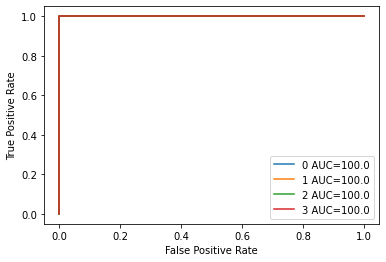

In [48]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],label=str(i)+' AUC='+str(roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Curva Precision-Recall

In [49]:
from sklearn.metrics import precision_recall_curve,auc

In [50]:
lr_precision = dict()
lr_recall = dict()
lr_auc = dict()
for i in range(n_classes):
    lr_precision[i], lr_recall[i], _ = precision_recall_curve(Y_teste[:, i], Y_previsto[:, i])
    lr_auc[i] = auc(lr_recall[i], lr_precision[i])*100

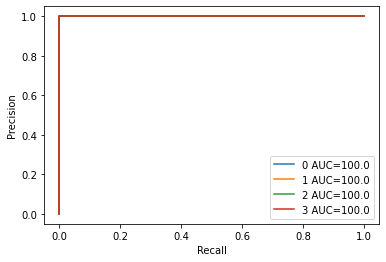

In [51]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],label=str(i)+' AUC='+str(lr_auc[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()